Titanic Survival Predictions (Beginner) \
(https://www.kaggle.com/nadintamer/titanic-survival-predictions-beginner)

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Shorney, Mr. Charles Joseph",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### Types of Data
- **Numerical :** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
- **Categorical :** Survived, Sex, Embarked, Pclass
- **Alphanumeric Features:** Ticket, Cabin

In [5]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 予想:
> Sex: 女性の生存率が高い \
SibSp/Parch: 独りで乗船している方が生存率が高い \
Age: 子どもの生存率は高い \
Pclass: ハイクラスの方が生存率が高い

## 分析

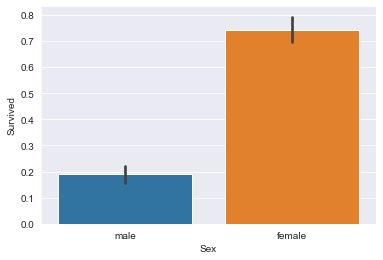

In [7]:
sns.barplot('Sex', 'Survived', data=train_df)

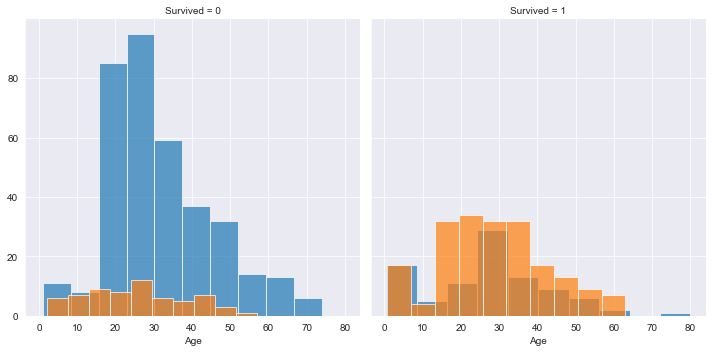

In [8]:
g = sns.FacetGrid(train_df, col='Survived', size=5, hue='Sex')
g.map(plt.hist, 'Age', alpha=0.7)

In [9]:
train_df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


> 予想通り \
女性の生存率が高い

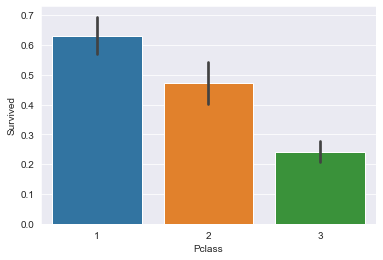

In [10]:
sns.barplot('Pclass', 'Survived', data=train_df)

In [11]:
train_df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


> 予想通り \
ハイクラス(Pclass=1)の方が生存率が高い

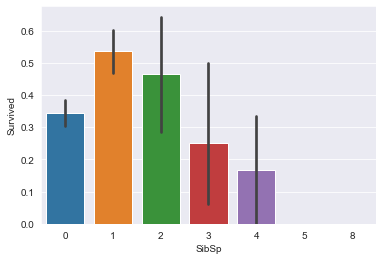

In [12]:
sns.barplot('SibSp', 'Survived', data=train_df)

In [13]:
train_df[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


> 兄弟姉妹が多い方が生存率が低い傾向にある。\
がいない人よりも1,2人いる方が生存率が高い

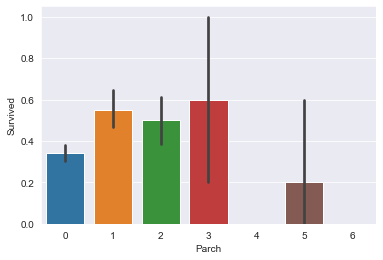

In [14]:
sns.barplot('Parch', 'Survived', data=train_df)

In [15]:
train_df[['Parch', 'Survived']].groupby('Parch', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


> 家族が4人以上は生存率が低い。 \
兄弟姉妹同様、いない人よりも1-3人いる方が生存率が高い

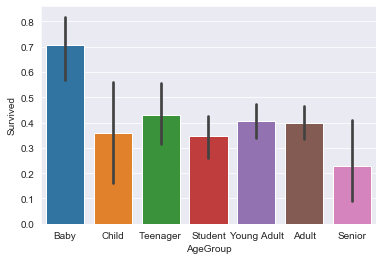

In [16]:
for dataset in combine:
    bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
    labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    
    dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels)
    
sns.barplot(x='AgeGroup', y='Survived', data=train_df)

> Baby(Age < 5)が最も生存率が高い

In [17]:
train_df['CabinBool'] = train_df['Cabin'].notna().astype(int)
train_df[['CabinBool', 'Survived']].groupby('CabinBool', as_index=False).mean().sort_values(by='Survived', ascending=False)

,CabinBool,Survived
1,1,0.666667
0,0,0.299854


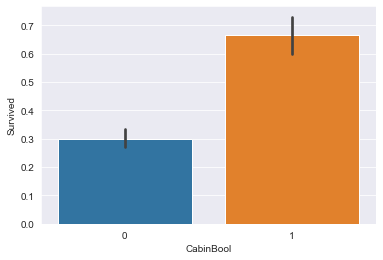

In [18]:
sns.barplot('CabinBool', 'Survived', data=train_df)

> 欠損値が多いCabinだが、 \
記録がある人の方が生存率が高い

## Cleaning Data

In [19]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult,0


In [20]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Student


### Drop Passenger Id

In [21]:
train_df.drop('PassengerId', axis=1, inplace=True)

### Create Title Drop Name

In [22]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract('([A-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
pd.crosstab(test_df['Title'], test_df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [24]:
for dataset in combine:
    dataset['Title'].replace(['Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Dona'], 'Rare', inplace=True)
    dataset['Title'].replace(['Jonkheer', 'Countess', 'Lady', 'Sir'], 'Royal', inplace=True)
    dataset['Title'].replace(['Mlle', 'Ms'], 'Miss', inplace=True)
    dataset['Title'].replace('Mme', 'Mrs', inplace=True)

In [25]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
5,Royal,0.750000
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.263158
2,Mr,0.156673


In [26]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Royal':4, 'Rare':5})

In [27]:
for dataset in combine:
    dataset.drop('Name', axis=1, inplace=True)

### Sex

In [28]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female':1})

### Create AgeGroup Drop Age

In [29]:
mr_age = train_df.loc[(train_df['Title'] == 0) & (train_df['Age'] > 0), 'Age'].median()
miss_age = train_df.loc[(train_df['Title'] == 1) & (train_df['Age'] > 0), 'Age'].median()
mrs_age = train_df.loc[(train_df['Title'] == 2) & (train_df['Age'] > 0), 'Age'].median()
master_age = train_df.loc[(train_df['Title'] == 3) & (train_df['Age'] > 0), 'Age'].median()
royal_age = train_df.loc[(train_df['Title'] == 4) & (train_df['Age'] > 0), 'Age'].median()
rare_age = train_df.loc[(train_df['Title'] == 5) & (train_df['Age'] > 0), 'Age'].median()

unknown_median_ages = (mr_age, miss_age, mrs_age, master_age, royal_age, rare_age)


for dataset in combine:
    for i in dataset['Title']:
        dataset.loc[(dataset['Age'].isna()) & (dataset['Title'] == i), 'Age'] = unknown_median_ages[i]

In [30]:
for dataset in combine:
    bins = [0, 5, 12, 18, 24, 35, 60, np.inf]
    labels = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=bins, labels=labels)

In [31]:
age_mapping = {'Baby': 0, 'Child': 1, 'Teenager': 2, 'Student': 3, 'Young Adult': 4, 'Adult': 5, 'Senior': 6}
for dataset in combine:
    dataset['AgeGroup'] = dataset['AgeGroup'].map(age_mapping)

In [32]:
for dataset in combine:
    dataset.drop('Age', axis=1, inplace=True)

### Drop Ticket

In [33]:
for dataset in combine:
    dataset.drop('Ticket', axis=1, inplace=True)

### Create FareBand Drop Fare

In [34]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,Title
152,1044,3,0,0,0,NaN,NaN,S,6,0


In [35]:
test_df['Fare'].fillna(train_df.loc[(train_df['Pclass'] == 3) & (train_df['Embarked'] == 'S'), 'Fare'].mean(), inplace=True)

In [36]:
for dataset in combine:
    labels = [0, 1, 2, 3]
    dataset['FareBand'] = pd.qcut(dataset['Fare'], 4, labels=labels)

In [37]:
for dataset in combine:
    dataset.drop('Fare', axis=1, inplace=True)

### Create CabinBool Drop Cabin

In [38]:
for dataset in combine:
    dataset['CabinBool'] = dataset['Cabin'].notna().astype(int)

In [39]:
for dataset in combine:
    dataset.drop('Cabin', axis=1, inplace=True)

### Drop Embarked

In [40]:
train_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [41]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})

In [42]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,0,3,0,1,0,0,3,0,0,0
1,1,1,1,1,0,1,5,1,2,3
2,1,3,1,0,0,0,4,0,1,1
3,1,1,1,1,0,0,4,1,2,3
4,0,3,0,0,0,0,4,0,0,1


In [43]:
test_df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand,CabinBool
0,892,3,0,0,0,2,4,0,0,0
1,893,3,1,1,0,0,5,2,0,0
2,894,2,0,0,0,2,6,0,1,0
3,895,3,0,0,0,0,4,0,1,0
4,896,3,1,1,1,0,3,2,1,0


## Modeling

In [44]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.22, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
log = LogisticRegression()

log.fit(X_train, y_train)
y_pred = log.predict(X_val)
acc_log = log.score(X_val, y_val)
print('train score',log.score(X_train, y_train))
print('val score', acc_log)

train score 0.8170028818443804
val score 0.8121827411167513


In [47]:
coeff_df = pd.DataFrame(index = train_df.columns.delete(0), columns = ['Coefficient'])
coeff_df['Coefficient'] = log.coef_.transpose()
coeff_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
Sex,2.221271
CabinBool,0.711216
Title,0.410622
FareBand,0.247695
Embarked,0.227155
Parch,-0.270865
AgeGroup,-0.330501
SibSp,-0.488284
Pclass,-0.542881


In [48]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc_knn = knn.score(X_val, y_val)
print('train score',knn.score(X_train, y_train))
print('val score', acc_knn)

train score 0.8688760806916427
val score 0.8223350253807107


In [49]:
svc = SVC(gamma='auto')

svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
acc_svc = svc.score(X_val, y_val)
print('train score',svc.score(X_train, y_train))
print('val score', acc_svc)

train score 0.8414985590778098
val score 0.8274111675126904


In [50]:
linear_svc = LinearSVC()

linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_val)
acc_linear_svc = linear_svc.score(X_val, y_val)
print('train score',linear_svc.score(X_train, y_train))
print('val score', acc_linear_svc)

train score 0.8141210374639769
val score 0.7918781725888325


In [51]:
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_val)
acc_nb = nb.score(X_val, y_val)
print('train score',nb.score(X_train, y_train))
print('val score', acc_nb)

train score 0.792507204610951
val score 0.7868020304568528


In [52]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)
acc_tree = tree.score(X_val, y_val)
print('train score',tree.score(X_train, y_train))
print('val score', acc_tree)

train score 0.9121037463976945
val score 0.7715736040609137


In [53]:
forest = RandomForestClassifier()

forest.fit(X_train, y_train)
y_pred = forest.predict(X_val)
acc_forest = forest.score(X_val, y_val)
print('train score', forest.score(X_train, y_train))
print('val score', acc_forest)

train score 0.9121037463976945
val score 0.8121827411167513


In [54]:
per = Perceptron()

per.fit(X_train, y_train)
y_pred = per.predict(X_val)
acc_per = per.score(X_val, y_val)
print('train score', per.score(X_train, y_train))
print('val score', acc_per)

train score 0.723342939481268
val score 0.7258883248730964


In [55]:
sgd = SGDClassifier()

sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_val)
acc_sgd = sgd.score(X_val, y_val)
print('train score', sgd.score(X_train, y_train))
print('val score', acc_sgd)

train score 0.7435158501440923
val score 0.7614213197969543


In [56]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_val)
acc_gbk = gbk.score(X_val, y_val)
print('train score', gbk.score(X_train, y_train))
print('val score', acc_gbk)

train score 0.8746397694524496
val score 0.8121827411167513


In [57]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_forest, acc_nb, acc_per ,acc_linear_svc, acc_tree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.827411
1,KNN,0.822335
2,Logistic Regression,0.812183
3,Random Forest,0.812183
9,Gradient Boosting Classifier,0.812183
6,Linear SVC,0.791878
4,Naive Bayes,0.786802
7,Decision Tree,0.771574
8,Stochastic Gradient Descent,0.761421
5,Perceptron,0.725888
